<a href="https://colab.research.google.com/github/daniazzam/General/blob/main/Diabetes_Dataset_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ANN: PART 1: DATA PROCESSING

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
tf.keras.backend.clear_session()

In [ ]:
dataset=pd.read_csv('diabetes_dataset.csv')

#the dataset contains values of 0 where it is an impossible case
#in glucose, bloodpressure, skinthickness, insulin and bmi levels
#however, 0 pregrancies is possible
#We will replace values of 0 with the mean value

dataset_copy = dataset.copy()

cols_head = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for i in cols_head:
    dataset_copy[i].replace(0,dataset_copy[i].mean(),inplace=True)

print(dataset.head())
print(dataset_copy.head())

X=dataset_copy.iloc[:,0:-1].values
Y=dataset_copy.iloc[:,-1].values

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0      35.000000   79.799479  33.6   
1            1     85.0           66.0      29.000000   79.799479  26.6   
2            8    183.0           64.0      20.536458   79.799479  23.3   
3  

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

Building the ANN

In [ ]:
#initialize ANN
ann=tf.keras.models.Sequential()

#first hidden layer
ann.add(tf.keras.layers.Dense(units=9,activation='relu'))
#second hidden layer
ann.add(tf.keras.layers.Dense(units=7,activation='relu'))
#output layer
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

Training the ANN

In [ ]:
#compile the ANN
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#traning the ANN on traning set
ann.fit(X_train,Y_train,batch_size=32,epochs=150)

Epoch 1/50
18/18 [==============================] - 1s 4ms/step - loss: 0.4165 - accuracy: 0.8056
Epoch 2/50
18/18 [==============================] - 0s 3ms/step - loss: 0.4155 - accuracy: 0.8056
Epoch 3/50
18/18 [==============================] - 0s 3ms/step - loss: 0.4152 - accuracy: 0.8056
Epoch 4/50
18/18 [==============================] - 0s 3ms/step - loss: 0.4149 - accuracy: 0.8056
Epoch 5/50
18/18 [==============================] - 0s 4ms/step - loss: 0.4146 - accuracy: 0.8056
Epoch 6/50
18/18 [==============================] - 0s 4ms/step - loss: 0.4142 - accuracy: 0.8056
Epoch 7/50
18/18 [==============================] - 0s 3ms/step - loss: 0.4139 - accuracy: 0.8038
Epoch 8/50
18/18 [==============================] - 0s 3ms/step - loss: 0.4138 - accuracy: 0.8073
Epoch 9/50
18/18 [==============================] - 0s 2ms/step - loss: 0.4139 - accuracy: 0.8073
Epoch 10/50
18/18 [==============================] - 0s 5ms/step - loss: 0.4131 - accuracy: 0.8056
Epoch 11/50
18/18 [

In [ ]:
n=ann.predict(sc.transform([[6,111,64,39,93,35,0.3,25]]))
print(n)
print(n>0.5)

[[0.21945772]]
[[False]]


[[1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]

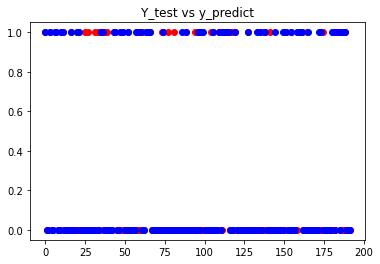

In [ ]:
#pridicting test set results
y_predict=ann.predict(X_test)
y_predict=(y_predict>0.5)

print(np.concatenate((y_predict.reshape(len(y_predict),1), Y_test.reshape(len(Y_test),1)),1))

import matplotlib.pyplot as plot

x=np.arange(0,len(y_predict),1)
plot.scatter(x, y_predict, color = 'red')
plot.scatter(x, Y_test, color = 'blue')
plot.title('Y_test vs y_predict')
plot.show()


In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_predict)
print('the confusion matrix')
print(cm)
print('the accuracy score is: '+str(accuracy_score(Y_test, y_predict)))

the confusion matrix
[[113  17]
 [ 22  40]]
the accuracy score is: 0.796875
